# Project 1

### Student:

### Student Number

In [1]:
1212411

1212411

### 1. Definition of the Dataset

#### Emotion Dataset

This Emotion Classification dataset is meant to help with research and experiments in natural language processing and emotion analysis. It includes a variety of text samples, each labeled with the emotion it expresses, such as happiness, excitement, anger, sadness, and more.


#### Project Objective
In this project, we aimed to compare three different word embedding methods—TF-IDF, GloVe, and spaCy embeddings—to determine their effectiveness in classifying emotions from text data. The dataset used for this analysis contains text samples labeled with three emotions: anger, fear, and joy.

Source: https://www.kaggle.com/datasets/abdallahwagih/emotion-dataset   


In [2]:
import spacy 
nlp = spacy.load('en_core_web_lg')

In [3]:
# Importing necessary libraries

import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np



In [4]:
# Check the first few lines of the file
file_path = 'Emotion_classify_Data.csv'

with open(file_path, 'r') as file:
    for _ in range(5):  # Adjust the number of lines to read as needed
        print(file.readline())

Comment,Emotion

i seriously hate one subject to death but now i feel reluctant to drop it,fear

im so full of life i feel appalled,anger

i sit here to write i start to dig out my feelings and i think that i am afraid to accept the possibility that he might not make it,fear

ive been really angry with r and i feel like an idiot for trusting him in the first place,joy



In [5]:
# Load dataset

df = pd.read_csv(file_path, encoding='utf-8')

In [6]:
# test dataset loading.

df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [7]:
# Basic information about the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [8]:
# Summary statistics
df.describe()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [9]:
# Check for missing values
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

### 2. Visualization of the Dataset Features and Results

The dataset was loaded and basic exploratory data analysis was conducted, including visualizing the distribution of emotions and generating a word cloud.

C:\Users\jeffe\AppData\Local\Temp\ipykernel_12404\3092132270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, palette='viridis')


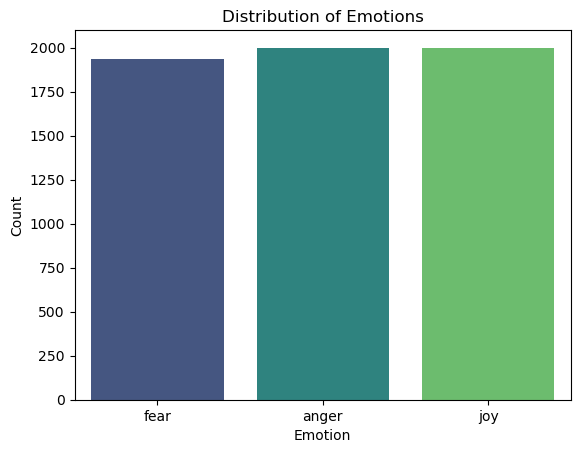

In [14]:
# Count plot of a "emotion" feature

sns.countplot(x='Emotion', data=df, palette='viridis')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

#### Considering there is 5937 records, the dataset is well-distributed among the three emotions, fear, anger, and joy.

In [15]:
# Double-check the count of each emotion
emotion_counts = df['Emotion'].value_counts()
print(emotion_counts)

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64


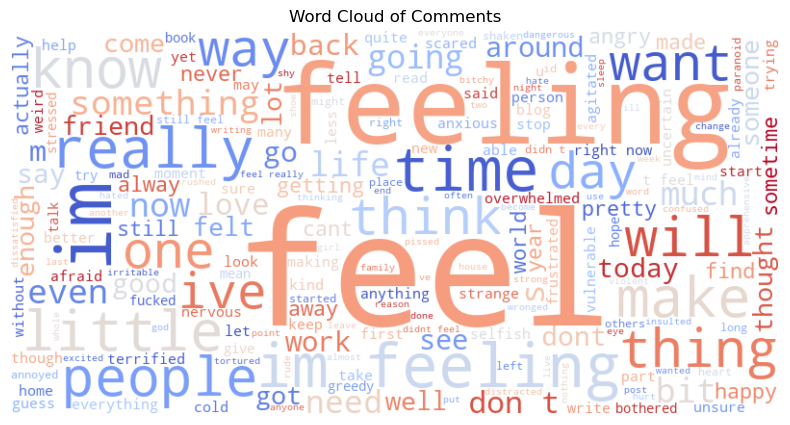

In [16]:
# References to plot the Word Cloud: https://www.datacamp.com/tutorial/wordcloud-python

# Assume the comments are in the first column
comments_column = df.columns[0]

# Combine all text data into one string
text = ' '.join(df[comments_column])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

### Word Cloud of comments words. 

Above there is a visual representation of text data where the size of each word indicates its frequency or importance within the dataset. 
In the context of this project, a word cloud helps to visualize the most common words in the comments, providing insights into the overall themes, topics, and sentiments expressed by users.



### 3. Cleaning the Text Document with Two Approaches

Text data was cleaned by removing stop words, punctuation, and lemmatizing the words using spaCy.

In [17]:
# Function to text processing
def text_cleaning(text):
    doc = nlp(text)
    #cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct] - previous version of the function
    cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and len(token.lemma_) > 1]
    return ' '.join(cleaned_tokens)

# Apply the cleaning function to the comments column
df['cleaned_text_spacy'] = df[comments_column].apply(text_cleaning)

# Display the first few rows to verify the cleaning
print(df[['cleaned_text_spacy']].head())

                                  cleaned_text_spacy
0   seriously hate subject death feel reluctant drop
1                                 life feel appalled
2  sit write start dig feeling think afraid accep...
3               ve angry feel like idiot trust place
4        feel suspicious outside like rapture happen


The goal of using advanced text processing with spaCy is to use its powerful tools to clean and analyze text more effectively and accurately.

In [19]:
# test dataset loading.

df.head()

,Comment,Emotion,cleaned_text_spacy
0,i seriously hate one subject to death but now ...,fear,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feeling think afraid accep...
3,ive been really angry with r and i feel like a...,joy,ve angry feel like idiot trust place
4,i feel suspicious if there is no one outside l...,fear,feel suspicious outside like rapture happen


### Noticed that there a few letters alone in the text, like "i", "r" and "m".

Let's clean these letters from the text removing any word with length less than 1.

So, I modified the function "text_cleaning" including: len(token.lemma_) > 1


### 4. Implementation of Three Word Embedding Methods

In [20]:
# Function to tokenize the cleaned text
def tokenize_text(text):
    return text.split()

# Apply the tokenization function to the cleaned text column
df['tokenized_text'] = df['cleaned_text_spacy'].apply(tokenize_text)


In [21]:
# Verify the tokenization

print(df[['cleaned_text_spacy', 'tokenized_text']].head())

                                  cleaned_text_spacy  \
0   seriously hate subject death feel reluctant drop   
1                                 life feel appalled   
2  sit write start dig feeling think afraid accep...   
3               ve angry feel like idiot trust place   
4        feel suspicious outside like rapture happen   

                                      tokenized_text  
0  [seriously, hate, subject, death, feel, reluct...  
1                             [life, feel, appalled]  
2  [sit, write, start, dig, feeling, think, afrai...  
3       [ve, angry, feel, like, idiot, trust, place]  
4  [feel, suspicious, outside, like, rapture, hap...  


In [22]:
# Word Embedding using Spacy

def spacy_vector(text):
    doc = nlp(text)
    return doc.vector

SpaCy Embeddings: spaCy's pre-trained large model was used to generate embeddings for the text.

In [23]:
X_spacy = df['cleaned_text_spacy'].apply(spacy_vector).tolist()
X_spacy = np.array(X_spacy)

# Verify the shapes of the transformed data
print("Shape :", X_spacy.shape)


Shape : (5937, 300)


In [24]:
# Word Embedding using TF-IDF (Term Frequency-Inverse Document Frequency)

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['cleaned_text_spacy'])
y_tfidf = df['Emotion']

This method transforms text data into numerical features by considering the frequency of terms in the document and their inverse frequency in the corpus.

In [26]:
# Check the shape
print("Shape of X (features):", X_tfidf.shape)
print("Shape of y (labels):", y_tfidf.shape)



Shape of X (features): (5937, 6931)
Shape of y (labels): (5937,)


In [27]:
# Word Embedding using Glove

# References: https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python
              #https://web.stanford.edu/class/archive/cs/cs106a/cs106a.1204/handouts/py-file.html

def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            try:
                values = line.split()
                word = values[0]
                coefs = np.asarray(values[1:], dtype='float32')
                embeddings_index[word] = coefs
            except ValueError:
                print(f"ValueError on line {i}: {line}")
    return embeddings_index

glove_file_path = 'glove.txt'
glove_embeddings = load_glove_embeddings(glove_file_path)
print(f'Loaded {len(glove_embeddings)} word vectors.')

Loaded 400000 word vectors.


Pre-trained GloVe embeddings were used to convert text into vectors by averaging the word vectors for each word in the text.

In [29]:
def get_glove_vector(text, embeddings):
    words = text.split()
    word_vectors = [embeddings[word] for word in words if word in embeddings]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(100)  # Assuming 100-dimensional embeddings

X_glove = df['cleaned_text_spacy'].apply(lambda x: get_glove_vector(x, glove_embeddings)).tolist()
X_glove = np.array(X_glove)

### 5. Comparison

Logistic regression models were trained for each embedding method.

The models were evaluated using accuracy, precision, recall, and F1-score.

Confusion matrices were plotted to visualize the performance of each model.

In [35]:
# Split the data into training and testing sets

X_train_spacy, X_test_spacy, y_train, y_test = train_test_split(X_spacy, df['Emotion'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, df['Emotion'], test_size=0.2, random_state=42)
X_train_glove, X_test_glove, _, _ = train_test_split(X_glove, df['Emotion'], test_size=0.2, random_state=42)


In [36]:
# Train a logistic regression model with spaCy embeddings
model_spacy = LogisticRegression(max_iter=1000)
model_spacy.fit(X_train_spacy, y_train)
y_pred_spacy = model_spacy.predict(X_test_spacy)

# Train a logistic regression model with TF-IDF
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Train a logistic regression model with GloVe
model_glove = LogisticRegression(max_iter=1000)
model_glove.fit(X_train_glove, y_train)
y_pred_glove = model_glove.predict(X_test_glove)


Evaluation for spaCy Embeddings
              precision    recall  f1-score   support

       anger       0.72      0.72      0.72       392
        fear       0.71      0.74      0.73       416
         joy       0.76      0.73      0.74       380

    accuracy                           0.73      1188
   macro avg       0.73      0.73      0.73      1188
weighted avg       0.73      0.73      0.73      1188



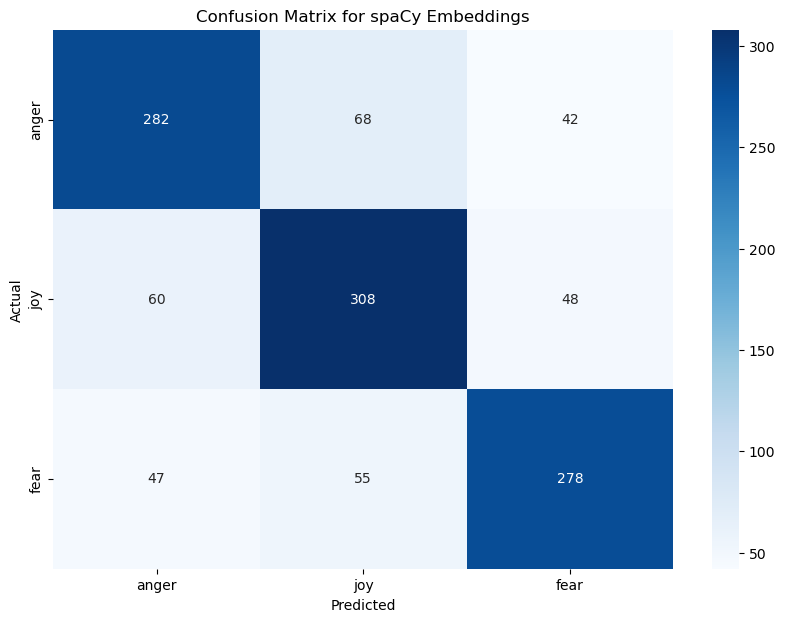

Evaluation for TF-IDF
              precision    recall  f1-score   support

       anger       0.92      0.93      0.93       392
        fear       0.95      0.90      0.92       416
         joy       0.91      0.95      0.93       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



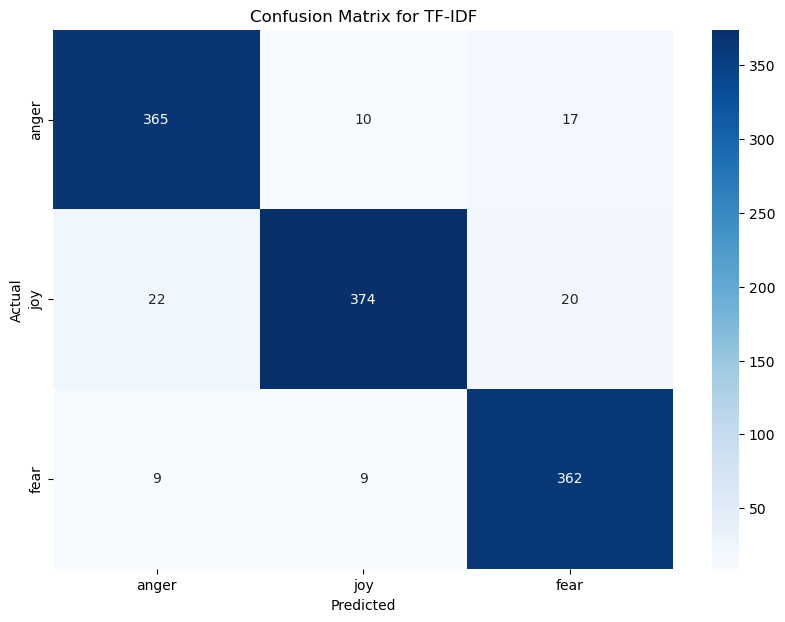

Evaluation for GloVe
              precision    recall  f1-score   support

       anger       0.68      0.70      0.69       392
        fear       0.69      0.66      0.67       416
         joy       0.76      0.77      0.77       380

    accuracy                           0.71      1188
   macro avg       0.71      0.71      0.71      1188
weighted avg       0.71      0.71      0.71      1188



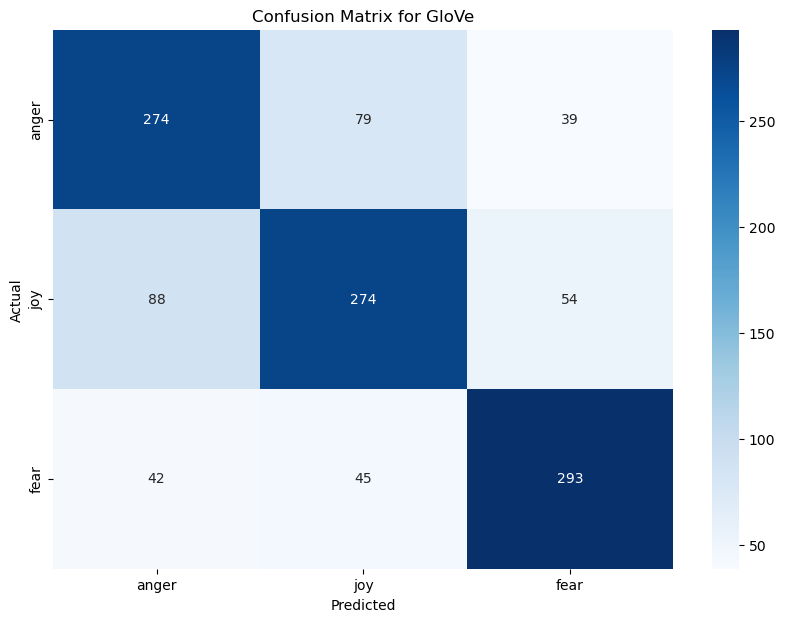

In [37]:
# Evaluate models and print results

def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation for {model_name}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_counts.index, yticklabels=emotion_counts.index)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Evaluate models
evaluate_model(y_test, y_pred_spacy, 'spaCy Embeddings')
evaluate_model(y_test, y_pred_tfidf, 'TF-IDF')
evaluate_model(y_test, y_pred_glove, 'GloVe')


### Results Comparison

The results indicate that TF-IDF is the most effective method for this emotion classification task. It provides the highest accuracy and balanced performance metrics. While spaCy embeddings offer semantic understanding and are useful for advanced NLP tasks, they were less effective than TF-IDF for this specific task. GloVe embeddings, though useful for capturing global word co-occurrences, were less effective than both TF-IDF and spaCy embeddings.

1. Accuracy

TF-IDF outperforms both spaCy and GloVe embeddings with a significant margin, achieving an accuracy of 0.93. This suggests that TF-IDF captures the most relevant features for this specific emotion classification task.

2. Precision, Recall, and F1-Score

TF-IDF has the highest precision, recall, and F1-score across all classes, indicating it has the best balance between precision and recall for this dataset.
spaCy Embeddings and GloVe have comparable performance, with spaCy slightly better in precision and recall compared to GloVe.

I think TF-IDF give us better results in the choosen dataset because the frequency of words like "feeling", "feel" plays a significant role determining which class the sentence belongs to.






